## MNIST dataset (handwritten digits) 
* Grayscale images
* 28x28 pixels, 60K training set, 10K test set
* Output 0-9 

## Procedure
#### STEP 1 : Data pre-processing
    Load mnist dataset from keras library
    Normalize the feature values
    One-hot encoding for o/p labels 
#### STEP 2 : Model creation
    Few convolution, Pooling layers => Fully connected layers => o/p layer (softmax for multi class classification)
    Early stopping call back
#### STEP 3 : Model evaluation
    Metrics
    confusion matrix

In [232]:
import matplotlib.pyplot as plt

## STEP 1 : Data pre-processing

#### Load mnist dataset from keras library

In [233]:
from tensorflow.keras.datasets import mnist

In [234]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

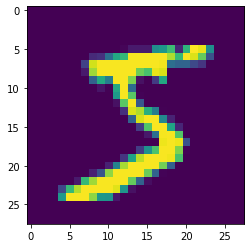

In [235]:
#Display an image from the training set
plt.imshow(x_train[0])

In [236]:
#corresponding label
y_train[0]

5

In [237]:
x_train.shape

(60000, 28, 28)

In [238]:
y_train.shape

(60000,)

#### Normalize the feature values

In [239]:
x_train.min()

0

In [240]:
x_train.max()

255

In [241]:
#normalize with grayscale intensity limits
x_train = x_train/255
x_test = x_test/255

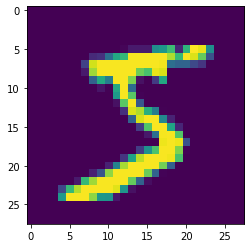

In [242]:
plt.imshow(x_train[0])

#### Reshae training and test data as per standard format

In [243]:
x_train = x_train.reshape(60000, 28, 28, 1) # single color channel
x_test = x_test.reshape(10000, 28, 28, 1) # single color channel

#### one-hot encoding for multi-class output labels

In [244]:
from tensorflow.keras.utils import to_categorical

In [245]:
y_train.shape

(60000,)

In [246]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [247]:
y_train = to_categorical(y_train) # auto derice number of classes from the data
y_train.shape

(60000, 10)

In [248]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [249]:
y_test_categorical = to_categorical(y_test) # auto derice number of classes from the data
y_test_categorical.shape

(10000, 10)

## STEP 2 : Model creation

In [250]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten, Dense

#### Create CNN model

In [272]:
model = Sequential()

#i/p image size = (28, 28, 1)

# convolution layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1,1), padding = 'valid', input_shape = x_train.shape[1:])) # o/p image shape = (26, 26, 32)
#pooling layers
model.add(MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid')) # o/p image shape = (13, 13, 32)
#Flatten the layer - Fully connected later
model.add(Flatten()) # o/p image shape = (13x13x32, 1) = (5408, 1)

#Fully connected later
model.add(Dense(units = 128, activation = 'relu'))

#o/p layer
model.add(Dense(units = 10, activation = 'softmax'))

#compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### Model kernel summary

In [273]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


#### Create call back for early stopping

In [252]:
from tensorflow.keras.callbacks import EarlyStopping
cb_earlystop = EarlyStopping(monitor = 'val_loss', patience = 2)

#### Train the model

In [253]:
model.fit(x_train, y_train, batch_size = 128, epochs = 20, validation_data = (x_test, y_test_categorical), callbacks = [cb_earlystop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 38s 628us/sample - loss: 0.2347 - accuracy: 0.9331 - val_loss: 0.1219 - val_accuracy: 0.9614
Epoch 2/20
60000/60000 [==============================] - 22s 371us/sample - loss: 0.0832 - accuracy: 0.9753 - val_loss: 0.0811 - val_accuracy: 0.9742
Epoch 3/20
60000/60000 [==============================] - 20s 332us/sample - loss: 0.0534 - accuracy: 0.9841 - val_loss: 0.0623 - val_accuracy: 0.9793
Epoch 4/20
60000/60000 [==============================] - 20s 332us/sample - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.0530 - val_accuracy: 0.9838
Epoch 5/20
60000/60000 [==============================] - 20s 332us/sample - loss: 0.0287 - accuracy: 0.9908 - val_loss: 0.0600 - val_accuracy: 0.9818
Epoch 6/20
60000/60000 [==============================] - 18s 304us/sample - loss: 0.0191 - accuracy: 0.9943 - val_loss: 0.0540 - val_accuracy: 0.9836


In [254]:
import numpy as np
import pandas as pd
import seaborn as sns

In [255]:
model_history = pd.DataFrame(model.history.history)

In [256]:
model_history

,loss,accuracy,val_loss,val_accuracy
0,0.234668,0.933067,0.121946,0.9614
1,0.083179,0.975300,0.081111,0.9742
2,0.053410,0.984150,0.062312,0.9793
3,0.036275,0.989017,0.053042,0.9838
4,0.028706,0.990850,0.060025,0.9818
5,0.019056,0.994317,0.054026,0.9836


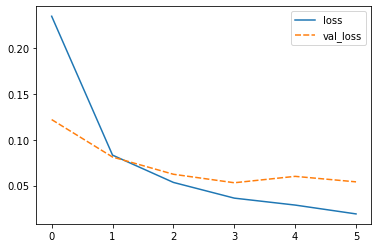

In [257]:
# Plot loss metric
sns.lineplot(data = model_history[['loss', 'val_loss']])

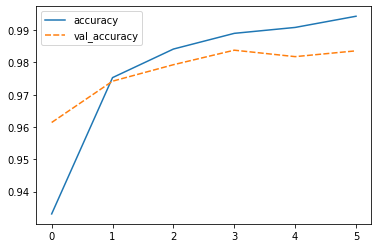

In [258]:
# Plot accuracy metric
sns.lineplot(data = model_history[['accuracy', 'val_accuracy']])

## STEP 3 : Model evaluation

#### Predict classes

In [259]:
model.evaluate(x_test, y_test_categorical, verbose = 0)

[0.05402566542405402, 0.9836]

In [260]:
y_pred = model.predict_classes(x_test)

In [261]:
y_pred.shape

(10000,)

In [262]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

#### Evaluation metrics

In [263]:
from sklearn.metrics import confusion_matrix, classification_report

In [264]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [265]:
confusion_matrix(y_test, y_pred)

array([[ 973,    0,    1,    0,    1,    1,    1,    2,    0,    1],
       [   0, 1129,    3,    1,    0,    0,    1,    1,    0,    0],
       [   2,    1, 1010,    2,    4,    0,    2,   10,    1,    0],
       [   0,    0,    3, 1000,    0,    3,    0,    2,    2,    0],
       [   0,    0,    0,    0,  978,    0,    0,    0,    0,    4],
       [   2,    0,    1,   13,    0,  874,    2,    0,    0,    0],
       [   8,    2,    1,    0,    1,    4,  941,    0,    1,    0],
       [   1,    3,    5,    1,    1,    0,    0, 1015,    1,    1],
       [   5,    0,    6,    9,    3,    2,    1,    4,  933,   11],
       [   1,    2,    0,    5,   13,    2,    0,    3,    0,  983]],
      dtype=int64)

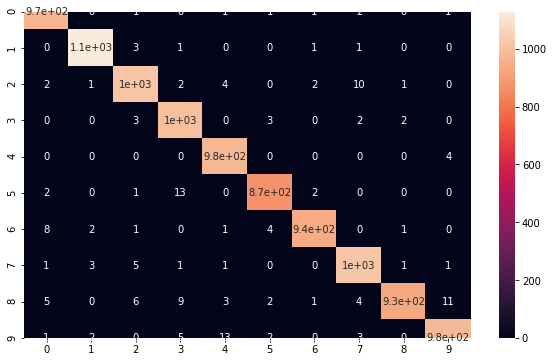

In [266]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

#### Predicting output for new input image

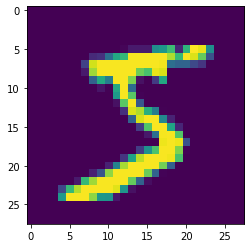

In [267]:
x_image = x_train[0].reshape(28, 28)
plt.imshow(x_image)

In [268]:
y_pred_image = model.predict_classes(x_image.reshape(1, 28, 28, 1))

In [269]:
y_pred_image

array([5], dtype=int64)